In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [7]:
#loding boston housing data
bostonh = datasets.load_boston()
feature_columns = bostonh.feature_names
target_column = bostonh.target
bhdata = pd.DataFrame(bostonh.data,
                      columns = feature_columns).astype(np.float32)
bhdata['MEDV'] = target_column.astype(np.float32)
bhdata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


In [14]:
bhdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float32
 1   ZN       506 non-null    float32
 2   INDUS    506 non-null    float32
 3   CHAS     506 non-null    float32
 4   NOX      506 non-null    float32
 5   RM       506 non-null    float32
 6   AGE      506 non-null    float32
 7   DIS      506 non-null    float32
 8   RAD      506 non-null    float32
 9   TAX      506 non-null    float32
 10  PTRATIO  506 non-null    float32
 11  B        506 non-null    float32
 12  LSTAT    506 non-null    float32
 13  MEDV     506 non-null    float32
dtypes: float32(14)
memory usage: 27.8 KB


In [20]:
bhdata.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


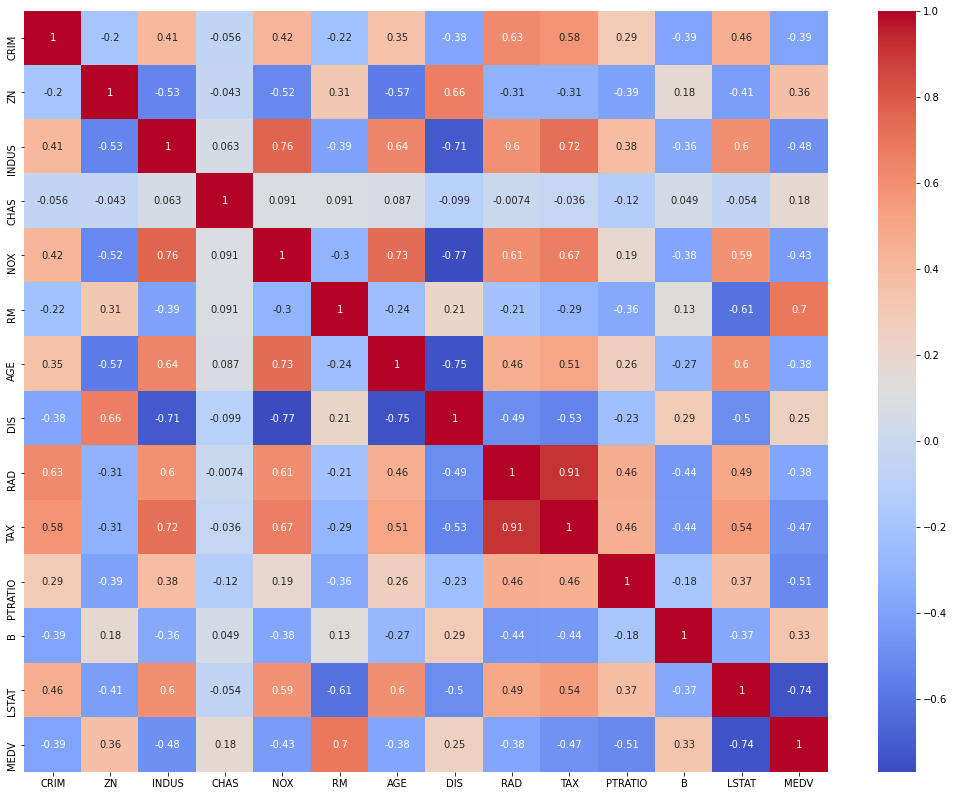

In [18]:
plt.figure(figsize=(18,14))
sns.heatmap(data=corr, annot=True,cmap='coolwarm')
plt.show()

#Method 1

The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.

Say your features were x, y and z Cartesian co-ordinates your scaled value for x would be:

xi

/

√(xi^2+yi^2+zi^2)

Each point is now within 1 unit of the origin on this Cartesian co-ordinate system.

Value range 0 to 1.

In [19]:
#Lets normalize the data 
from sklearn.preprocessing import normalize
bhdata_normailze = normalize(bhdata,axis=0) 
columns = bhdata.columns
bhdata_normailze = pd.DataFrame(bhdata_normailze, columns=columns)
bhdata_normailze.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000030,0.030868,0.007853,0.0,0.042208,0.046222,0.039107,0.041904,0.003442,0.029798,0.036604,0.047927,0.015241,0.043845
1,0.000130,0.000000,0.024035,0.0,0.036795,0.045139,0.047324,0.050890,0.006883,0.024362,0.042585,0.047927,0.027973,0.039461
2,0.000130,0.000000,0.024035,0.0,0.036795,0.050510,0.036648,0.050890,0.006883,0.024362,0.042585,0.047436,0.012334,0.063393
3,0.000154,0.000000,0.007411,0.0,0.035932,0.049196,0.027471,0.062109,0.010325,0.022349,0.044738,0.047653,0.008998,0.061018
4,0.000329,0.000000,0.007411,0.0,0.035932,0.050243,0.032509,0.062109,0.010325,0.022349,0.044738,0.047927,0.016312,0.066133


#Method2 - mix max scaler

The MinMaxScaler is the probably the most famous scaling algorithm, and follows the following formula for each feature:

(xi–min(x))
/
(max(x)–min(x))


It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider the Robust Scaler

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bhdata_MinMaxScaler = scaler.fit_transform(bhdata)
bhdata_MinMaxScaler1 = pd.DataFrame(bhdata_MinMaxScaler, columns=bhdata.columns)
bhdata_MinMaxScaler1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


#Method 3

The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

(xi–mean(x))
/
stdev(x)


If data is not normally distributed, this is not the best scaler to use.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bhdata_StandardScaler = scaler.fit_transform(bhdata)

bhdata_StandardScaler = pd.DataFrame(bhdata_StandardScaler, columns = bhdata.columns)
bhdata_StandardScaler.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287910,-0.272599,-0.144218,0.413672,-0.120014,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867882,-0.987329,-0.303095,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867882,-0.987329,-0.303095,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228576,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026502,1.487503


#Method 4 Robust Scaler

The RobustScaler uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rathar than the min-max, so that it is robust to outliers. Therefore it follows the formula:

xi–Q1(x)

/

Q3(x)–Q1(x)

For each feature.

Of course this means it is using the less of the data for scaling so it’s more suitable for when there are outliers in the data.

In [30]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
bhdata_RobustScaler = scaler.fit_transform(bhdata)
bhdata_RobustScaler = pd.DataFrame(bhdata_RobustScaler, columns=bhdata.columns)
bhdata_RobustScaler.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339285,0.261901,-0.637681,0.351097
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287941,0.028542,0.569789,-0.15,-0.227390,-0.446428,0.261901,-0.221889,0.050157
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446428,0.066674,-0.732634,1.692790
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069784,-0.646279,0.924391,-0.10,-0.279070,-0.124999,0.153016,-0.841579,1.529781
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.124999,0.261901,-0.602699,1.880878
